<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [1]:
import io
import requests
import ssl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import preprocessing
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context

**1. Загрузить датасет**

In [2]:
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
dataset.isnull().sum().sum()

0

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [4]:
sum(dataset['Class'] == 0)

284315

In [5]:
sum(dataset['Class'] == 1)

492

(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

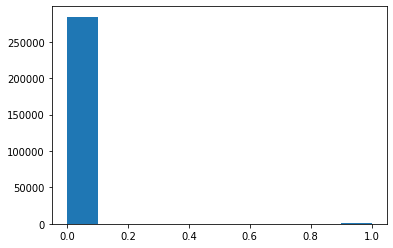

In [6]:
plt.hist(dataset['Class'])

**или так**

In [7]:
dataset_count = dataset[['Class', 'Time']]
dataset_count.columns = ['class', 'number']
dataset_count = dataset_count.groupby('class').count().reset_index()
dataset_count

,class,number
0,0,284315
1,1,492


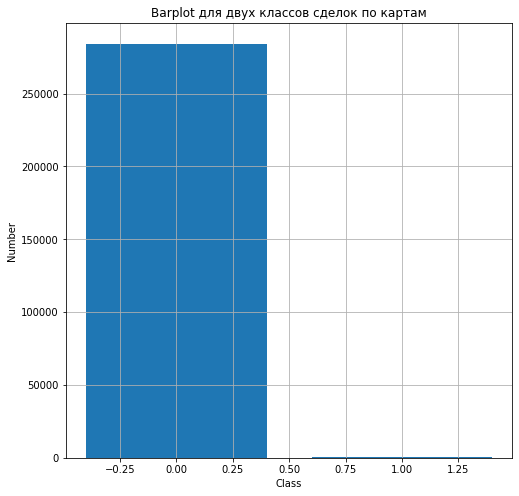

In [8]:
plt.bar(dataset_count['class'], dataset_count['number'])
plt.xlabel('Class')
plt.ylabel('Number')
plt.title('Barplot для двух классов сделок по картам')
plt.grid(True)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [9]:
dataset_0 = dataset[dataset['Class'] == 0]
dataset_1 = dataset[dataset['Class'] == 1]

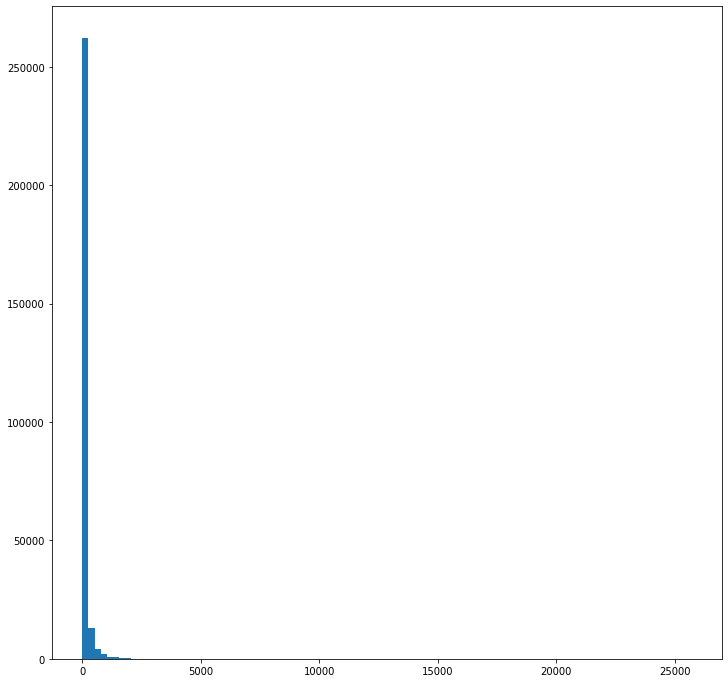

In [10]:
plt.hist(dataset_0['Amount'],100)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

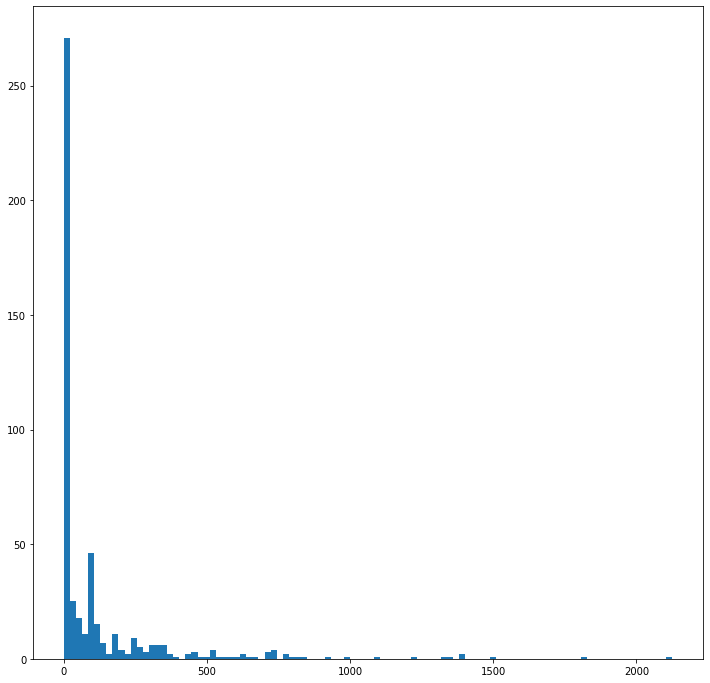

In [11]:
plt.hist(dataset_1['Amount'],100)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

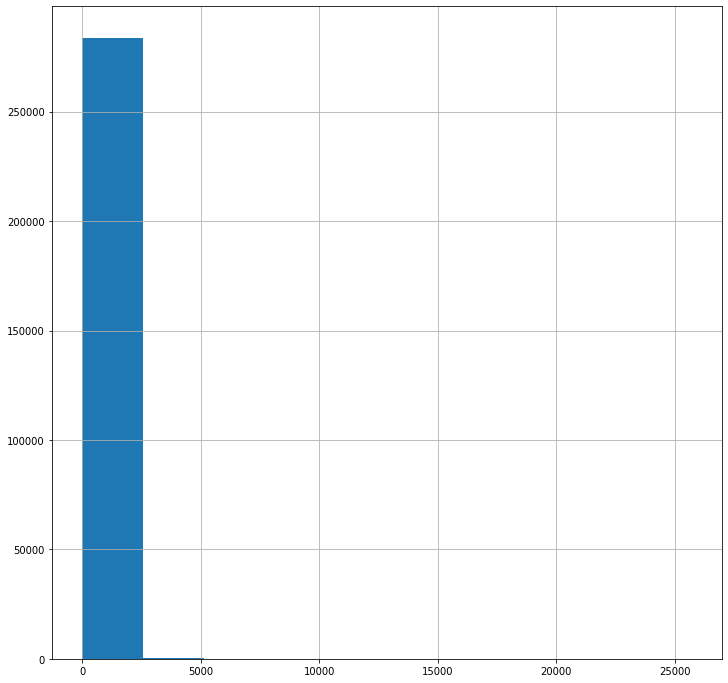

In [12]:
dataset_0['Amount'].hist()
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

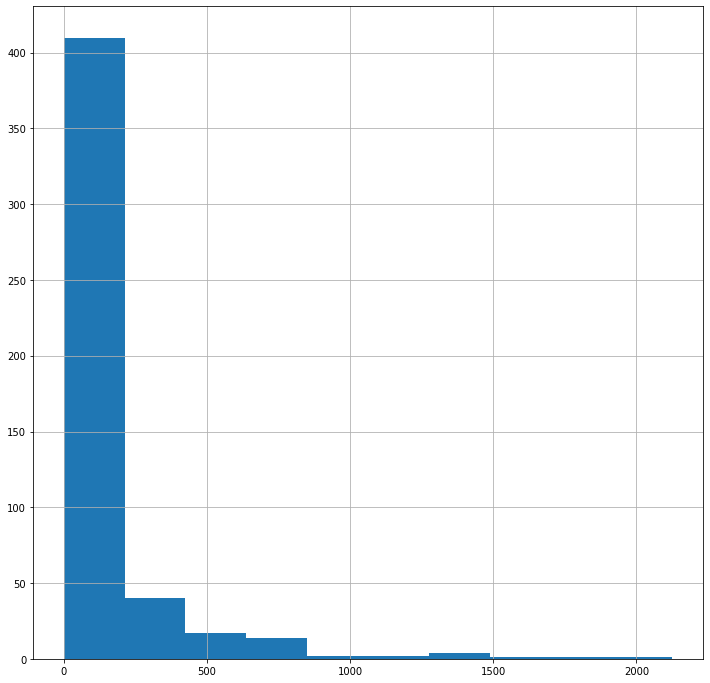

In [13]:
dataset_1['Amount'].hist()
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

**5. Построить графики histograms для всех значений**

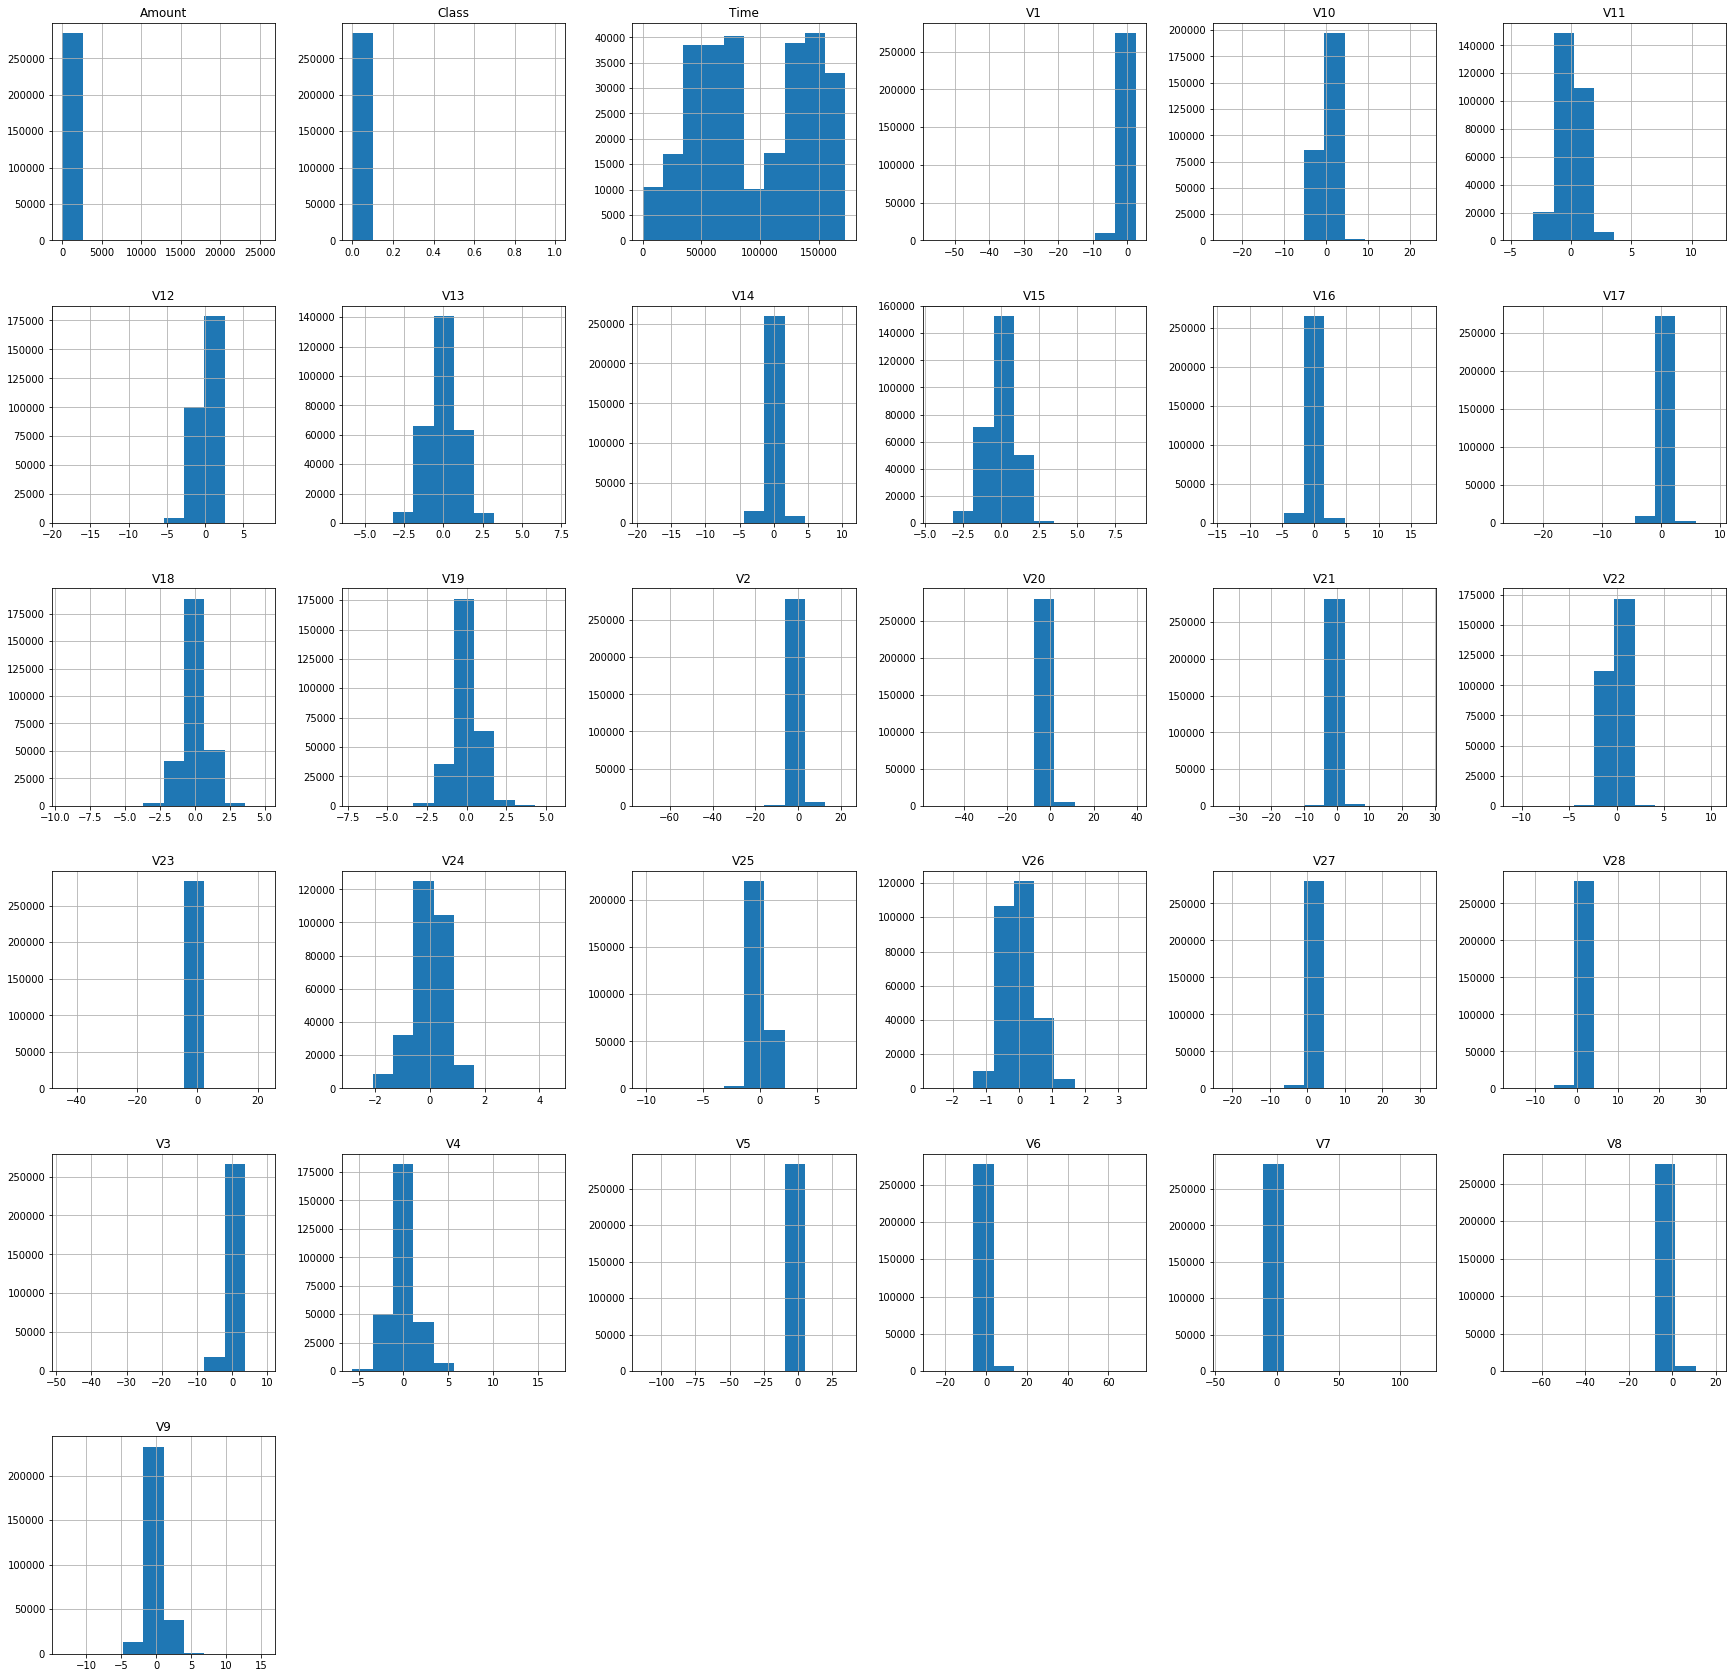

In [14]:
dataset.hist()
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()

**6. Построить матрицу корреляций для всех значений**

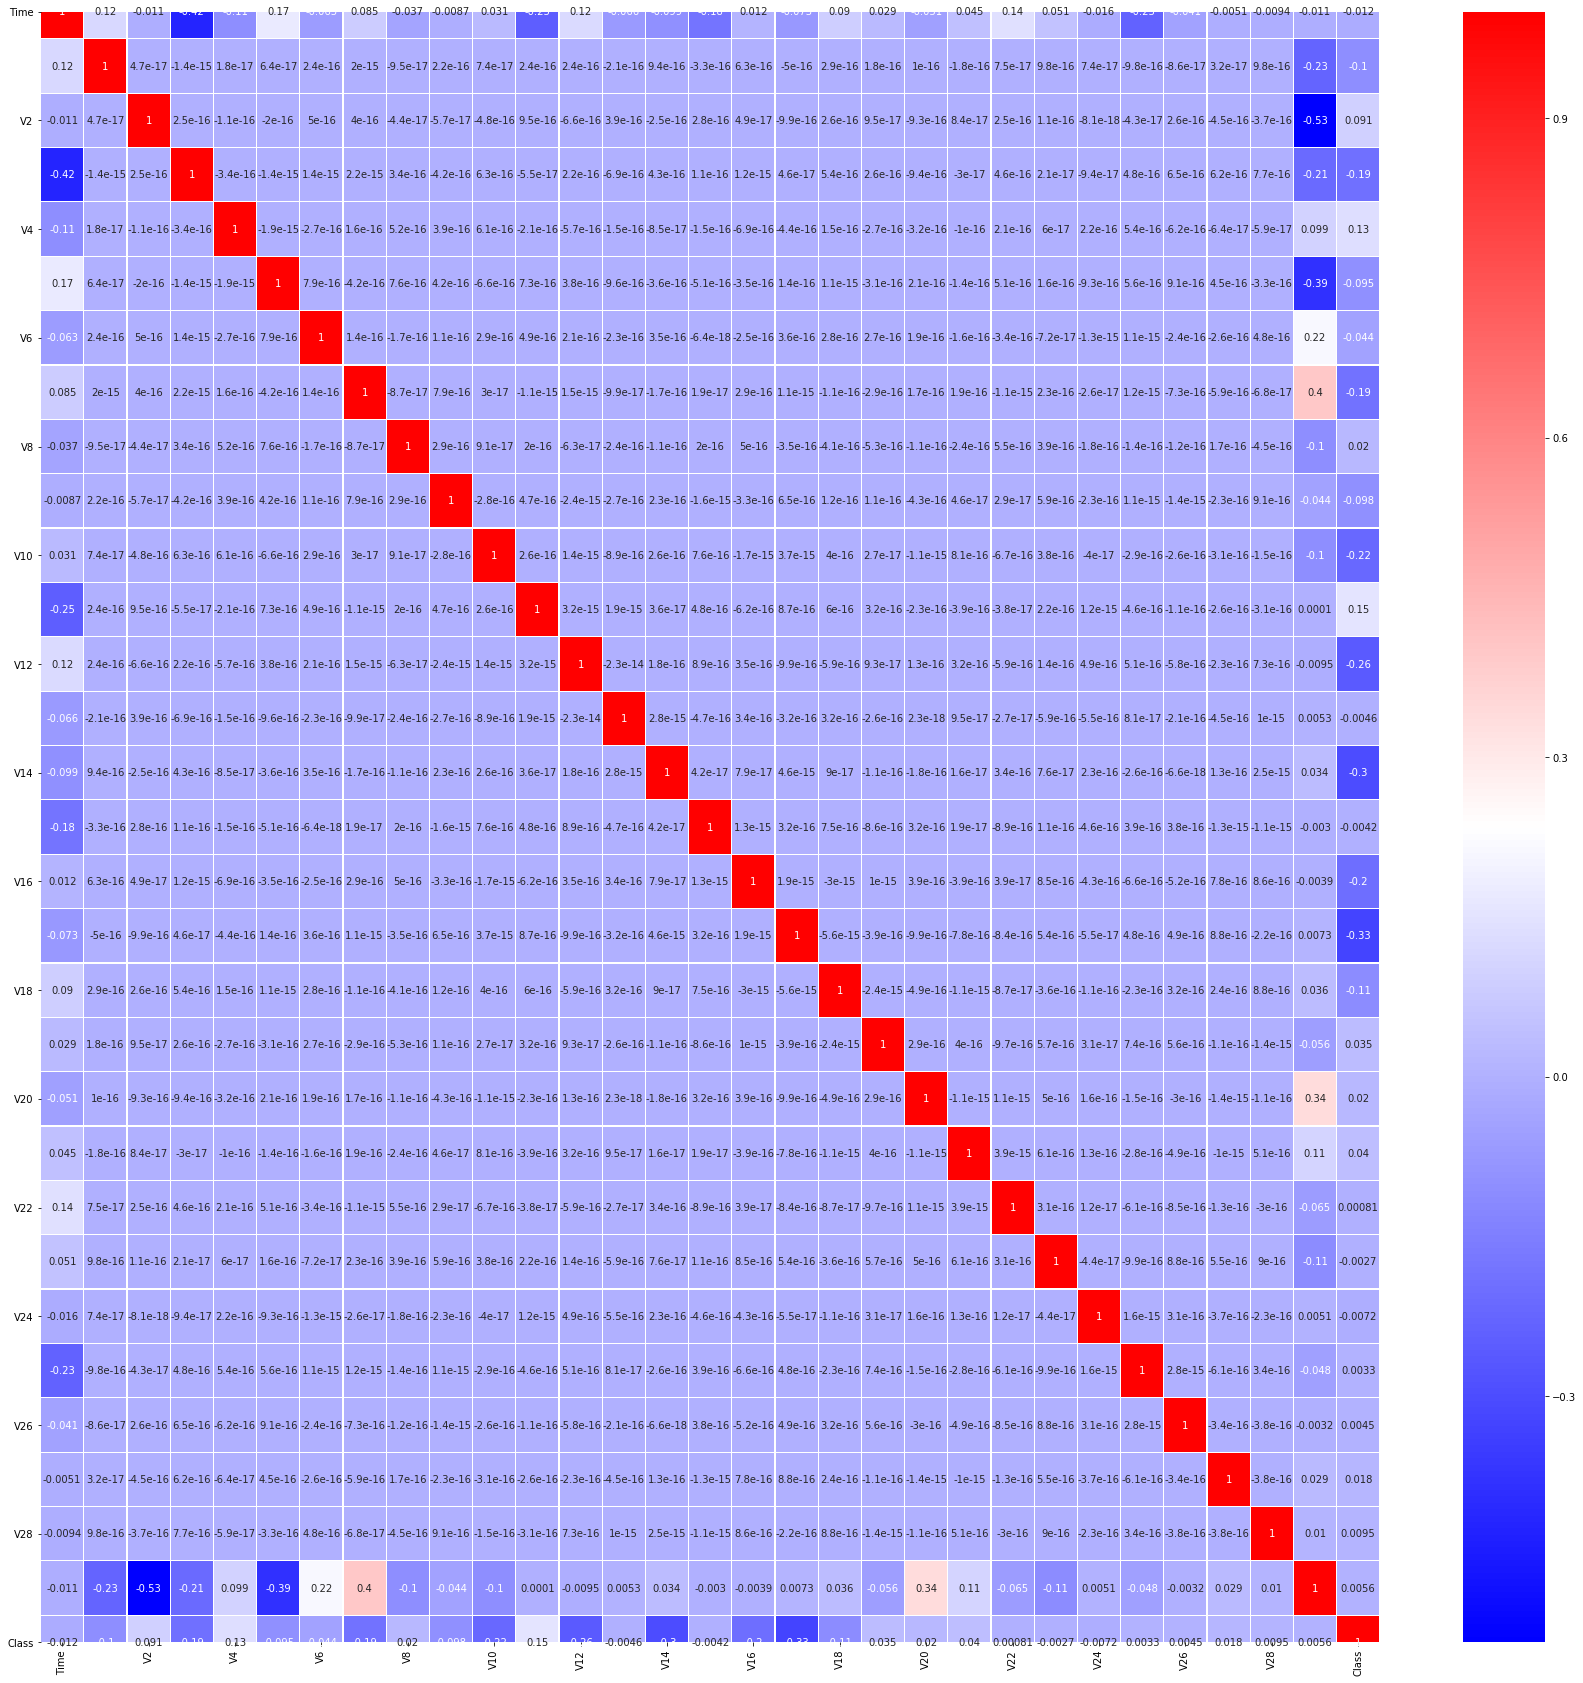

In [15]:
sns.heatmap(dataset.corr(), annot=True, linewidth=0.2, cmap='bwr')
fig=plt.gcf()
fig.set_size_inches(30,30)

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

In [16]:
input_x = dataset.iloc[:,:30]
Y = dataset['Class']

In [17]:
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

Модель Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


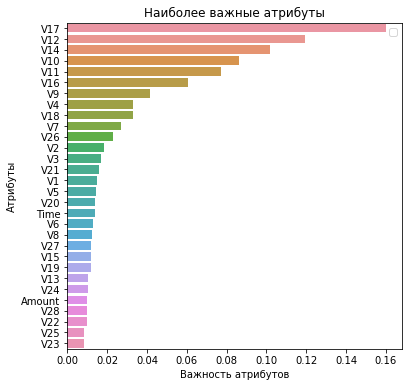

In [19]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Как делать classification report:

In [20]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85315
           1       0.97      0.77      0.86       128

    accuracy                           1.00     85443
   macro avg       0.99      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



0.9996254813150287

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

In [21]:
headers = list(dataset.columns.values)

In [22]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
np_scaled = min_max_scaler.fit_transform(dataset)
dataset_norm = pd.DataFrame(np_scaled)

In [23]:
dataset_norm.columns = headers
dataset_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


In [24]:
input_x = dataset_norm.iloc[:,:30]
Y = dataset_norm['Class']

In [25]:
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

In [26]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train_22,y_train_22)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


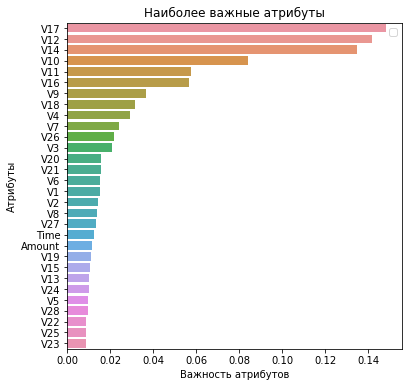

In [30]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [31]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     85299
         1.0       0.95      0.77      0.85       144

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



0.9995435553526912

В данном случае точность модели с нормализованными данными и с не нормализованными практически одинаковая. Нормализовывать не нужно.

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [34]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train_22, y_train_22)
X_resampled, y_resampled = ros.fit_sample(X_train_22, y_train_22)
print('Количество элементов до операции:', len(X_train_22))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 199364
Количество элементов после операции: 398032


C:\Users\GoG\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [35]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train_22,y_train_22)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


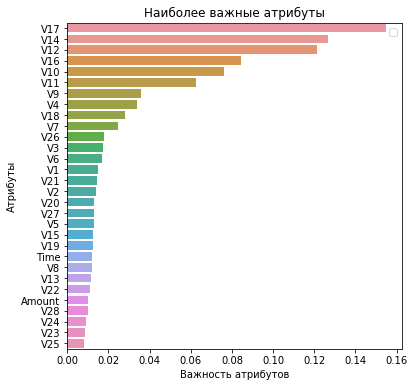

In [36]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [37]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     85299
         1.0       0.95      0.78      0.86       144

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



0.9995669627705019